
## Libraries


In [6]:

##!pip install mlxtend
!pip install onnxmltools --upgrade
!pip install onnxruntime --upgrade
##!pip install onnx
##!pip install onnxruntime-tools
##!pip install scikit-learn==0.24

In [1]:

import numpy as np
import torch
import pandas as pd
import sklearn
import random

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:

import matplotlib.pyplot as plt

from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

## coefficient of determination 
from sklearn.metrics import r2_score


In [5]:

import onnxruntime as rt
import onnxmltools

from skl2onnx.common.data_types import FloatTensorType


ModuleNotFoundError: No module named 'onnxconverter_common'


## Parameters 


In [6]:

## 0.001, 0.0001, 0.0003, 0.01, 0.03

batch_size    = 16
learning_rate = 0.005 ## 0.001
N_Epochs      = 100

epsilon = 0.0001



## Read data


In [14]:

path_data = 'Concrete_data.csv'

Concrete_raw_data = pd.read_csv(path_data, delimiter=",")

In [15]:
Concrete_raw_data


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [16]:

headers_list = Concrete_raw_data.columns.values.tolist()

headers_list


['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

In [17]:
print(Concrete_raw_data.dtypes)


Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object



## Data Analysis

* Correlation matrix


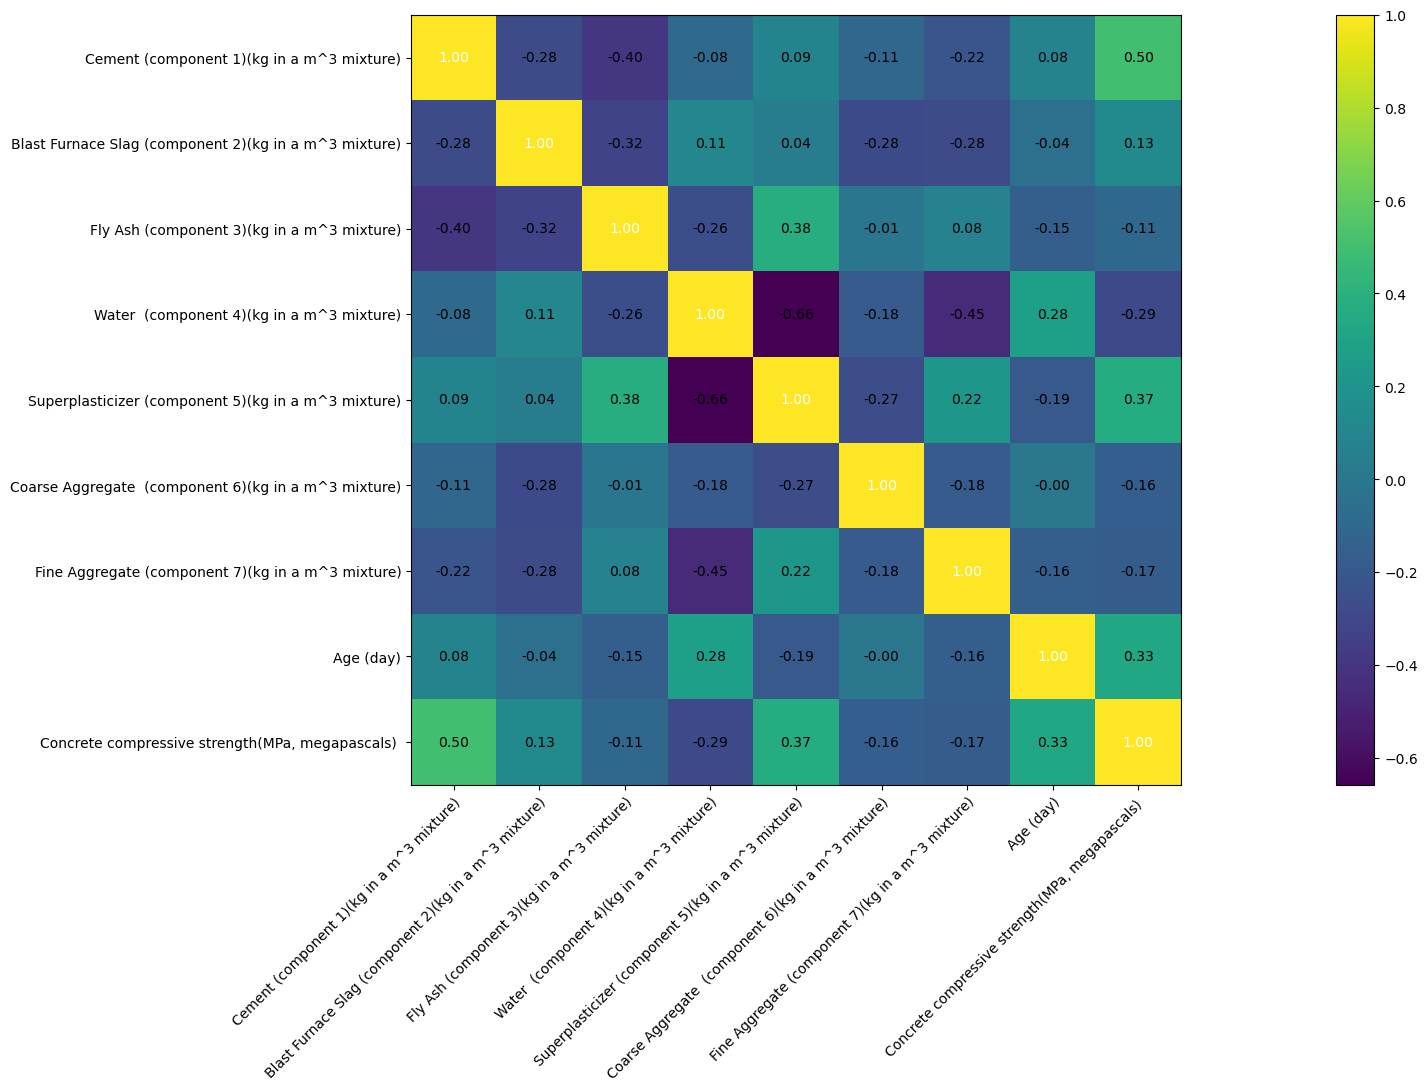

In [18]:

cm = np.corrcoef(   Concrete_raw_data[headers_list].values.T   )
hm = heatmap(cm, row_names=headers_list, column_names=headers_list, figsize=(40,10))
plt.show()




## Process Data


In [19]:

## Convert Pandas to Numpy

Concrete_raw_data_np = Concrete_raw_data.to_numpy()



In [20]:
Concrete_raw_data_np


array([[540.  ,   0.  ,   0.  , ..., 676.  ,  28.  ,  79.99],
       [540.  ,   0.  ,   0.  , ..., 676.  ,  28.  ,  61.89],
       [332.5 , 142.5 ,   0.  , ..., 594.  , 270.  ,  40.27],
       ...,
       [148.5 , 139.4 , 108.6 , ..., 780.  ,  28.  ,  23.7 ],
       [159.1 , 186.7 ,   0.  , ..., 788.9 ,  28.  ,  32.77],
       [260.9 , 100.5 ,  78.3 , ..., 761.5 ,  28.  ,  32.4 ]])

In [21]:

Concrete_raw_data_np.shape


(1030, 9)

In [55]:

X = Concrete_raw_data_np[:, :-1]


y = Concrete_raw_data_np[:, 8:9]


In [56]:

y


array([[79.99],
       [61.89],
       [40.27],
       ...,
       [23.7 ],
       [32.77],
       [32.4 ]])

In [57]:

print(X.shape)

print(y.shape)


(1030, 8)
(1030, 1)


In [58]:

random_seed = int( random.random() * 100 )     ## 42


In [59]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)


In [60]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(824, 8)
(206, 8)
(824, 1)
(206, 1)


In [61]:

y_test.dtype 


dtype('float64')


## Fix in case float64 error


In [62]:

## fix data type

X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )
y_train = y_train.astype(  np.float32  )
y_test  = y_test.astype(   np.float32  )


In [63]:

X_train_tr = torch.from_numpy(X_train)
X_test_tr  = torch.from_numpy(X_test)
y_train_tr = torch.from_numpy(y_train)
y_test_tr  = torch.from_numpy(y_test)



## Normalization

* Normalizartion
* Standardization (*)


In [64]:


x_means      = X_train_tr.mean(0, keepdim=True ) 

x_deviations = X_train_tr.std( 0, keepdim=True) + epsilon


In [65]:

x_means


tensor([[279.5691,  71.4456,  54.5527, 181.5169,   6.0123, 973.5641, 776.8947,
          44.6092]])

In [66]:

x_deviations


tensor([[104.4834,  85.4175,  64.2720,  20.9555,   5.7922,  77.3492,  78.3447,
          60.5848]])


## Create the DataLoader


In [67]:

train_ds = TensorDataset( X_train_tr, y_train_tr  )


In [68]:

train_dl = DataLoader( train_ds, batch_size, shuffle=True  )


In [69]:

train_dl



## Neural Network Architectures


In [70]:

## Linear Regression

class LinRegNet(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear(8, 1)
        
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means) / self.x_deviations
        
        y_pred = self.linear1(x)
        ## return torch.round( y_pred )
        return y_pred
        
    



In [30]:


## MLP

class MLP_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear(11, 8)
        self.act1    = nn.Sigmoid()
        self.linear2 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(0.25)
        
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means) / self.x_deviations
        
        x = self.linear1(x)
        x = self.act1(x)
        x = self.dropout(x)
        y_pred = self.linear2(x)
        
        ## return torch.round( y_pred )
        return y_pred
        
    


In [82]:

## Deep Learning with 2 hidden layers

class DL_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear(8, 10)
        self.act1    = nn.ReLU()
        self.linear2 = nn.Linear(10, 6)
        self.act2    = nn.ReLU()
        self.linear3 = nn.Linear(6, 1)
        self.dropout = nn.Dropout(0.25)
        
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means) / self.x_deviations
        
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        ## x = self.dropout(x)
        y_pred = self.linear3(x)
        
        ## return torch.round( y_pred )
        return y_pred


In [32]:

## Linear plus Nonlinear
## f1 + f2

class LinearPlusNonLinear_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        ## F1
        self.f1_linear1 = nn.Linear(11, 1)
        
        ## F2
        self.f2_linear1 = nn.Linear(11, 14)
        self.f2_act1    = nn.Sigmoid()
        self.f2_linear2 = nn.Linear(14, 1)
        
    
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_linear2(f2)
        
        y_pred = f1 + f2
        
        ## return torch.round( y_pred )
        return y_pred


## Training Loop

In [71]:

def training_loop( N_Epochs, model, loss_fn, opt  ):
    
    for epoch in range(N_Epochs):
        for xb, yb in train_dl:
            
            y_pred = model(xb)
            loss   = loss_fn(y_pred, yb)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        if epoch % 20 == 0:
            print(epoch, "loss=", loss)
            
        



In [83]:

##model = LinRegNet( x_means, x_deviations  )
model = DL_Net( x_means, x_deviations  )

opt     = torch.optim.Adam(    model.parameters(), lr=learning_rate )
loss_fn = F.mse_loss

training_loop(  N_Epochs, model, loss_fn, opt  )


0 loss= tensor(722.8673, grad_fn=<MseLossBackward0>)
20 loss= tensor(17.1297, grad_fn=<MseLossBackward0>)
40 loss= tensor(36.2251, grad_fn=<MseLossBackward0>)
60 loss= tensor(57.8706, grad_fn=<MseLossBackward0>)
80 loss= tensor(133.4628, grad_fn=<MseLossBackward0>)



## Evaluate Model


In [84]:

y_pred_test = model( X_test_tr )


In [85]:

y_pred_test.shape


torch.Size([206, 1])

In [86]:

y_pred_test_np = y_pred_test.detach().numpy()

In [87]:
y_pred_test_np.shape

(206, 1)

In [91]:

print("Testing R**2:", r2_score(y_test_tr, y_pred_test_np))


Testing R**2: 0.5070952838731979


In [92]:

y_pred_test.shape


torch.Size([206, 1])

In [93]:

y_test_tr.shape


torch.Size([206, 1])

In [94]:

len(X_test_tr)


206

In [95]:

list_preds = []
list_reals = []

for i in range(len(X_test_tr)):
    print("************************************")
    print("pred, real")
    np_real =   y_test_tr[i].detach().numpy()
    np_pred = y_pred_test[i].detach().numpy()
    print(( np_pred  , np_real))
    list_preds.append(np_pred[0])
    list_reals.append(np_real[0])

************************************
pred, real
(array([33.032127], dtype=float32), array([21.91], dtype=float32))
************************************
pred, real
(array([19.95668], dtype=float32), array([19.93], dtype=float32))
************************************
pred, real
(array([22.095654], dtype=float32), array([36.44], dtype=float32))
************************************
pred, real
(array([20.635029], dtype=float32), array([11.96], dtype=float32))
************************************
pred, real
(array([37.063126], dtype=float32), array([39.84], dtype=float32))
************************************
pred, real
(array([52.14886], dtype=float32), array([66.95], dtype=float32))
************************************
pred, real
(array([23.867378], dtype=float32), array([21.18], dtype=float32))
************************************
pred, real
(array([44.25978], dtype=float32), array([52.12], dtype=float32))
************************************
pred, real
(array([29.165932], dtype=float32),


## Deploy PyTorch Model


In [97]:

model.eval()

dummy_input = torch.randn(1, 8)

input_names  = ["input1"]
output_names = ["output1"]

torch.onnx.export(
        model, 
        dummy_input,
        "DLnet_ConcreteData.onnx",
        verbose=False,
        input_names = input_names,
        output_names = output_names
        
)



## XGBoost


In [44]:

regressor = xgb.XGBRegressor(

        n_estimators=100,
        reg_lambda=1,
        gamma=0,
        max_depth=3
)


In [45]:

regressor.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [46]:

y_pred = regressor.predict(X_test)


In [47]:

y_pred.shape


(980,)

In [48]:

y_pred


array([6.2326202, 4.4206686, 5.6231894, 5.447074 , 5.786892 , 6.315818 ,
       5.8023324, 6.1303716, 5.6460342, 5.6285048, 7.4895597, 5.984465 ,
       5.6439905, 6.740044 , 6.6828666, 6.043607 , 6.6795683, 5.7465963,
       6.6159964, 5.674297 , 5.2604785, 6.139823 , 6.706662 , 6.533718 ,
       6.6101875, 5.3285427, 5.377452 , 6.302136 , 6.7847342, 6.539221 ,
       5.3334565, 6.164492 , 6.0931544, 5.4653206, 5.3794484, 6.6182623,
       5.1338077, 5.7315454, 6.4470987, 5.6527143, 5.0422783, 7.148013 ,
       4.7029676, 4.7665086, 5.3183374, 4.501408 , 5.261326 , 6.444076 ,
       5.989423 , 6.3300667, 6.0898147, 6.3903966, 6.4454355, 5.9414144,
       6.1857667, 5.717079 , 5.78403  , 6.544661 , 5.0494566, 5.37927  ,
       6.223482 , 5.4720063, 5.7472453, 5.76529  , 6.4002423, 6.765065 ,
       5.096116 , 6.738721 , 5.281392 , 6.567681 , 7.100226 , 5.6668415,
       5.071908 , 6.8574114, 5.619689 , 5.9733815, 6.131563 , 5.831585 ,
       6.312606 , 6.553593 , 5.732092 , 4.7058926, 

In [49]:


r2_score(y_test, y_pred)


0.44846979136245346


## Deploy XGBoost Model

* ONNX and GitHub


In [58]:

initial_types = [(
          'float_input',
          FloatTensorType(  [None, 11 ]  )

)]





In [60]:

onnx_model = onnxmltools.convert_xgboost(regressor, initial_types=initial_types)

onnxmltools.utils.save_model(onnx_model, 'xgboost_WineQuality_ort.onnx')


In [61]:

sess = rt.InferenceSession('xgboost_WineQuality_ort.onnx')


In [62]:

input_name = sess.get_inputs()[0].name


In [63]:

input_name


'float_input'

In [65]:

label_name = sess.get_outputs()[0].name


In [66]:

label_name


'variable'

In [67]:

pred_ort = sess.run(  [label_name], {input_name: X_test.astype(np.float32)}  )


In [69]:
pred_ort[0]

array([[6.2326193],
       [4.420668 ],
       [5.6231885],
       [5.447074 ],
       [5.7868905],
       [6.315819 ],
       [5.8023334],
       [6.130371 ],
       [5.646033 ],
       [5.6285048],
       [7.489558 ],
       [5.984465 ],
       [5.643991 ],
       [6.740044 ],
       [6.6828647],
       [6.0436068],
       [6.6795673],
       [5.746597 ],
       [6.6159954],
       [5.674298 ],
       [5.260479 ],
       [6.1398244],
       [6.706661 ],
       [6.533717 ],
       [6.6101847],
       [5.328541 ],
       [5.377451 ],
       [6.3021355],
       [6.7847323],
       [6.539221 ],
       [5.333458 ],
       [6.164492 ],
       [6.093156 ],
       [5.465321 ],
       [5.379449 ],
       [6.618262 ],
       [5.1338077],
       [5.731544 ],
       [6.447099 ],
       [5.6527157],
       [5.042279 ],
       [7.148012 ],
       [4.7029696],
       [4.7665076],
       [5.318337 ],
       [4.501408 ],
       [5.261326 ],
       [6.444078 ],
       [5.989422 ],
       [6.330066 ],
